In [23]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [21]:
# 6.1

# Create an numpy-array, containing the data 1; 2; 3; : : : ; 10. Calculate mean and
# sample(!)-standard deviation. (Correct answer for the SD: 3.03.)

xs = np.arange(1,11)

x_bar = np.mean(xs)
s = np.std(xs, ddof=1)

print(f"Mean: {x_bar:.2f}, Standard Deviation: {s:.2f}")

Mean: 5.50, Standard Deviation: 3.03


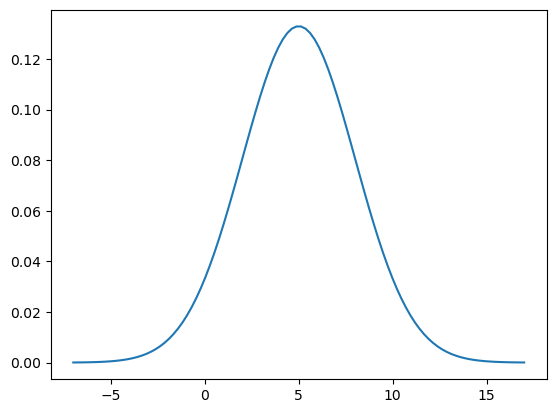

In [40]:
# 6.2

# Generate and plot the Probability Density Function (PDF) of a normal distribution, 
# with a mean of 5 and a standard deviation of 3.

mean = 5
std_dev = 3

x = np.linspace(mean-4*std_dev, mean+4*std_dev, 100)
pdf = stats.norm.pdf(x, loc=mean, scale=std_dev)
plt.plot(x, pdf)

In [34]:
# Generate 1000 random data from this distribution.
# Calculate the standard error of the mean of these data.

xs = stats.norm.rvs(loc=mean, scale=std_dev, size=1000)
x_bar = np.mean(xs)
s = np.std(xs, ddof=1)
std_error_mean = stats.sem(xs)
print(f"SEM: {std_error_mean:.2f}")


SEM: 0.10


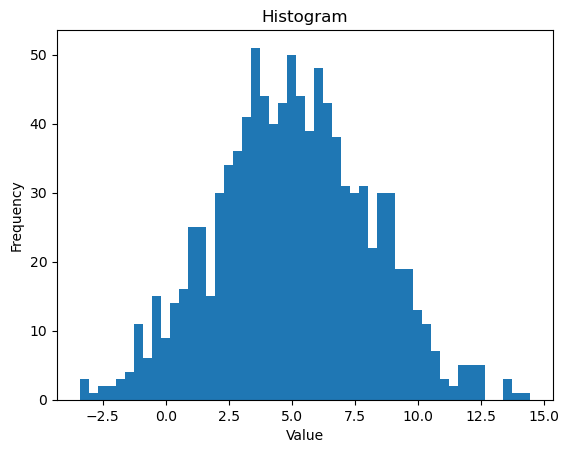

Lower bound of 95%: -0.88, upper bound of 95%: 10.88


In [43]:
# Plot the histogram of these data.
# From the PDF, calculate the interval containing 95 % of these data.

plt.hist(xs, 50)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()

lower_bound = stats.norm.ppf(0.025, loc=mean, scale=std_dev)
upper_bound = stats.norm.ppf(0.975, loc=mean, scale=std_dev)

print(f"Lower bound of 95%: {lower_bound:.2f}, upper bound of 95%: {upper_bound:.2f}")

In [50]:
# Your doctor tells you that he can use hip implants for surgery even if they are
# 1 mm bigger or smaller than the specified size. And your financial officer tells
# you that you can discard 1 out of 1000 hip implants, and still make a profit.
# What is the required standard deviation for the producer of the hip implants,
# to simultaneously satisfy both requirements?

# 99.9% of implants must be within 1mm of the mean, so:

z_score = stats.norm.ppf(0.9995)
std_dev = 1/z_score
print(f"Tolerance is an s.d. of {std_dev}")

Tolerance is an s.d. of 0.3039027127266642


In [66]:
# 6.3 

# t-Distribution: Measuring the weight of your colleagues, you have obtained the
# following weights: 52, 70, 65, 85, 62, 83, 59 kg. Calculate the corresponding
# mean, and the 99 % confidence interval for the mean. Note: with n values you
# have n - 1 DOF for the t-distribution.

x = np.array([52, 70, 65, 85, 62, 83, 59])
df = len(x) - 1
alpha = 0.01
mean = x.mean()
ci = abs(stats.t(df).ppf(alpha/2)*stats.sem(x))
print(f"Mean: {mean:.1f} +/- {ci:.1f}kg")


Mean: 68.0 +/- 17.2kg


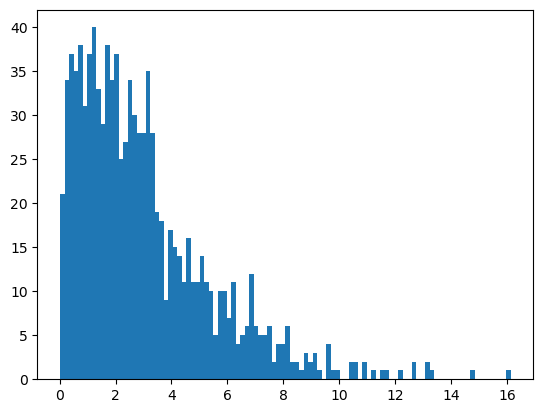

In [67]:
# Chi-square Distribution: Create three normally distributed data sets (mean = 0, SD = 1), 
# with 1000 samples each. Then square them, sum them (so that you have 1000 data-points), 
# and create a histogram with 100 bins. This should be similar to the curve for the 
# chi-square distribution, with 3 DOF (i.e., it should come down at the left).

nd = stats.norm()
num_points = 1000

data1 = nd.rvs(1000)
data2 = nd.rvs(1000)
data3 = nd.rvs(1000)

plt.hist(data1**2 + data2**2 + data3**2, 100)
plt.show()

In [77]:
# F-Distribution: You have two apple trees. There are three apples from the first
# tree that weigh 110, 121, and 143 g, respectively, and four from the other which
# weigh 88, 93, 105, and 124 g, respectively. Are the variances from the two trees
# different?
# Note: calculate the corresponding F-value, and check if the CDF for the
# corresponding F-distribution is < 0:025.

apples1 = [110, 121, 143]
apples2 = [88, 93, 105, 124]

fval = (np.std(apples1, ddof=1)*2)/(np.std(apples2, ddof=1)*2)
fd = stats.f(len(apples1),len(apples2))
p_fval = fd.cdf(fval)
print(f"p_fval={p_fval:.3f}, which is between the 0.025 and 0.975 confidence bounds, so no.")


p_fval=0.538, which is between the 0.025 and 0.975 confidence bounds, so no.


In [80]:
# Binomial Distribution: “According to research, pure blue eyes in Europe
# approach greatest frequency in Finland, Sweden, and Norway (at 72 %), followed
# by Estonia, Denmark (69 %); Latvia, Ireland (66 %); Scotland (63 %); Lithuania
# (61 %); The Netherlands (58 %); Belarus, England (55 %); Germany (53 %);
# Poland, Wales (50 %); Russia, The Czech Republic (48 %); Slovakia (46 %); 
# Belgium (43 %); Austria, Switzerland, Ukraine (37 %); France, Slovenia (34 %);
# Hungary (28 %); Croatia (26 %); Bosnia and Herzegovina (24 %); Romania
# (20 %); Italy (18 %); Serbia, Bulgaria (17 %); Spain (15 %); Georgia, Portugal
# (13 %); Albania (11 %); Turkey and Greece (10 %). 
# Further analysis shows that the average occurrence of blue eyes in Europe is 34 %, 
# with 50 % in Northern Europe and 18 % in Southern Europe.”
# If we have 15 Austrian students in the classroom, what is the chance of finding
# three, six, or ten students with blue eyes?

n = 15
p = 0.37
bd = stats.binom(n, p)
x = [3, 6, 10]
probs = bd.pmf(x)

for num, solution in zip(x,probs):
    print(f'Probability of finding {num} students with blue eyes is {solution*100:.1f}%.')

Probability of finding 3 students with blue eyes is 9.0%.
Probability of finding 6 students with blue eyes is 20.1%.
Probability of finding 10 students with blue eyes is 1.4%.


In [82]:
# Poisson Distribution: In 2012 there were 62 fatal accidents on streets in Austria.
# Assuming that those are evenly distributed, we have on average 62/(365/7) = 1:19 
# fatal accidents per week. How big is the chance that in a given week there
# are no, two, or five accidents? 

prob = 62./(365./7)
pd = stats.poisson(prob)

x = [0, 2, 5]
y = pd.pmf(x)
for num, solution in zip(x,y):
    print(f"Probability of having {num} fatal accidents in one week is {solution*100:4.1f}%.")

Probability of having 0 fatal accidents in one week is 30.5%.
Probability of having 2 fatal accidents in one week is 21.5%.
Probability of having 5 fatal accidents in one week is  0.6%.
